In [5]:
import numpy as np 
import pymultinest as pmn
import bagpipes as pipes
from astropy.table import Table
from astropy.io import ascii, fits
import matplotlib.pyplot as plt
from tqdm import tqdm

In [6]:
import matplotlib

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=20), plt.rc('ytick', labelsize=20)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

### prepare the central galaxy catalog 
for completeness vs. radius estimation

upload to Graham 

In [3]:
import os

In [6]:
sat_dir = 'clauds_cat_v2020/total_sample_v2cat_masscut_1025/'
os.system('mkdir '+sat_dir+'central_cats/')
for cat_name in ['COSMOS_deep', 'ELAIS_deep', 'XMM-LSS_deep', 'DEEP_deep']:
    for z in [0.4, 0.6, 0.8]:
        central_dir = cat_name +'_'+str(z*10)+'/'
        cat_central = Table.read(sat_dir + central_dir + 'isolated_'+cat_name+
                                 '_11.15_'+str(z)+'_massive_normal_params_new.positions.fits')
        
        print(cat_name,z,len(cat_central))
        cat_central.write(sat_dir+'central_cats/''central_'+cat_name+'_'+str(z)+'.fits', overwrite=True)

COSMOS_deep 0.4 193
COSMOS_deep 0.6 198
COSMOS_deep 0.8 430
ELAIS_deep 0.4 236
ELAIS_deep 0.6 186
ELAIS_deep 0.8 518
XMM-LSS_deep 0.4 147
XMM-LSS_deep 0.6 204
XMM-LSS_deep 0.8 364
DEEP_deep 0.4 251
DEEP_deep 0.6 190
DEEP_deep 0.8 464


### completeness vs radius

In [150]:
curves_r = np.genfromtxt('completeness_curve_v2/curves/comp_bootstrap_all_all_8.5_9.5_0.5_0.7.txt')
comp_all = np.median(curves_r, axis=0)
comp_all_l = np.percentile(curves_r,16, axis=0)
comp_all_h = np.percentile(curves_r,84, axis=0)

Text(0, 0.5, 'completeness')

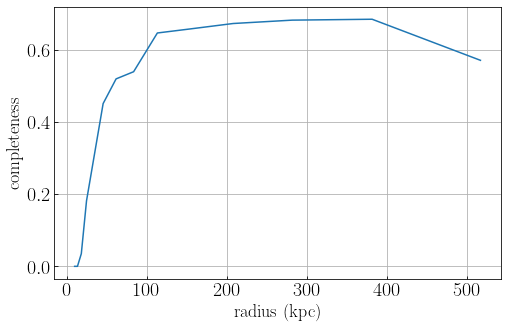

In [151]:
bin_number=14
bin_edges = 10 ** np.linspace(1.0, np.log10(700), num=bin_number + 1)

plt.figure(figsize = (8, 5))
plt.plot(bin_edges[:-1],comp_all)
plt.grid()

plt.xlabel('radius (kpc)',fontsize=18)
plt.ylabel('completeness',fontsize=18)

### completeness vs mass
in different redshift bins

Text(0, 0.5, 'completeness')

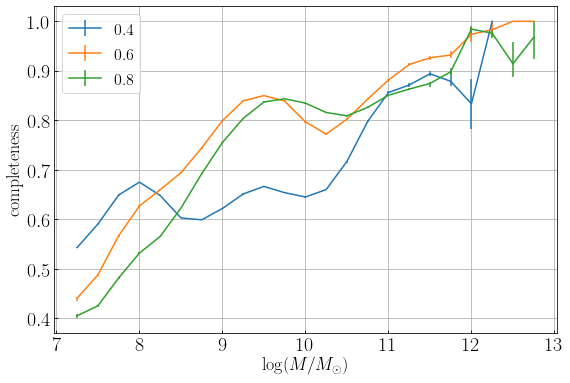

In [160]:
bin_edges = np.linspace(7, 13, num=25)
bin_centers = np.diff(bin_edges) + bin_edges[:-1]
plt.figure(figsize = (9, 6))

for z in [0.4, 0.6, 0.8]:
    curves_mass = np.genfromtxt('completeness_curve_mag/curves/comp_bootstrap_mass_'+str(round(z-0.1,1))+'_'+
                                str(round(z+0.1,1))+'.txt')

    comp_all = np.median(curves_mass, axis=0)
    comp_all_l = np.percentile(curves_mass,16, axis=0)    
    comp_all_h = np.percentile(curves_mass,84, axis=0)
    
    plt.errorbar(bin_centers,comp_all,label=str(round(z,1)),yerr=[comp_all-comp_all_l,comp_all_h-comp_all],fmt='-')
    
plt.grid()
plt.legend(fontsize=16)

plt.xlabel(r'$\log(M/M_\odot)$',fontsize=18)
plt.ylabel('completeness',fontsize=18)

### completeness vs i-band magnitude

In [154]:
curves_mass = np.genfromtxt('completeness_curve_mag/curves/comp_bootstrap_mag.txt')
comp_all = np.median(curves_mass, axis=0)
comp_all_l = np.percentile(curves_mass,16, axis=0)
comp_all_h = np.percentile(curves_mass,84, axis=0)

Text(0, 0.5, 'completeness')

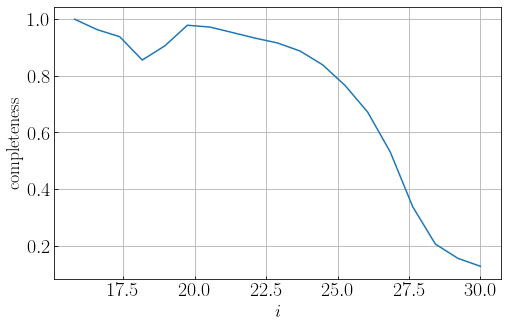

In [155]:
bin_edges = np.linspace(15, 30, num=20)
bin_centers = np.diff(bin_edges) + bin_edges[:-1]

plt.figure(figsize = (8, 5))
plt.plot(bin_centers,comp_all)
plt.grid()

plt.xlabel(r'$i$',fontsize=18)
plt.ylabel('completeness',fontsize=18)

### Mock Galaxy Catalog Mass/redshift distribution

In [405]:
mock_cat = Table.read('completeness_curve_mag/Output_cats/matched_cat_stack_COSMOS_deep_gal_cut_params.fits')

original_cat = Table.read('clauds_cat_v2020/COSMOS_deep_v2_v200930.fits')
original_cat = original_cat[original_cat['MASK']==0]
original_cat = original_cat[original_cat['inside_u'] == True]
original_cat = original_cat[~np.isnan(original_cat['Z_BEST'])]
original_cat = original_cat[original_cat['OBJ_TYPE'] == 0]

In [402]:
print(len(mock_cat),len(original_cat))

1719620 4695985


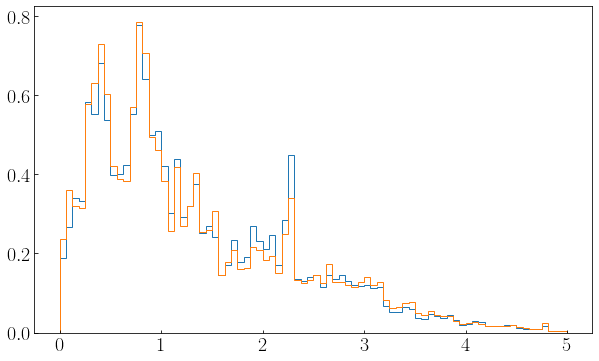

In [403]:
fig = plt.figure(figsize=(10,6))

plt.hist(mock_cat['Z_BEST'],bins=80, range=[0,5],histtype='step',density=True)
plt.hist(original_cat['Z_BEST'],bins=80, range=[0,5],histtype='step',density=True)
plt.show()

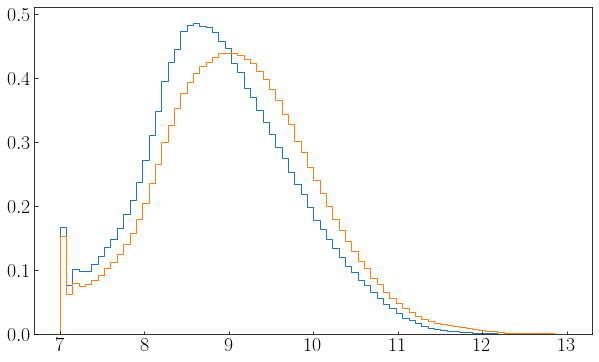

In [404]:
fig = plt.figure(figsize=(10,6))

plt.hist(mock_cat['MASS_MED'],bins=80, range=[7,13],histtype='step',density=True)
plt.hist(original_cat['MASS_MED'],bins=80, range=[7,13],histtype='step',density=True)
plt.show()

### Example Visual Check

In [68]:
import aplpy
from astropy.io import fits
from astropy.wcs import WCS

In [70]:
rand1_cutout = fits.open('/Users/lejay/Desktop/9571_46_1/cutout_9571_46_1.fits')
rand2_cutout = fits.open('/Users/lejay/Desktop/9571_46_1/cutout_9571_46_1_9_rand.fits')

In [103]:
rand1_wcs = WCS(rand1_cutout[0])
rand2_wcs = WCS(rand2_cutout[0])

rand1_center = rand1_wcs.all_pix2world(rand1_wcs.pixel_shape[0]/2,rand1_wcs.pixel_shape[1]/2,0)
rand2_center = rand2_wcs.all_pix2world(rand2_wcs.pixel_shape[0]/2,rand2_wcs.pixel_shape[1]/2,0)

rand1_corner1 = rand1_wcs.all_pix2world(rand1_wcs.pixel_shape[0],rand1_wcs.pixel_shape[1],0)
rand1_corner2 = rand1_wcs.all_pix2world(0,0,0)

width = abs(rand1_corner1[0] - rand1_corner2[0])

In [104]:
print(rand1_center)
print(rand2_center)

[array(151.097), array(1.168)]
[array(151.11), array(1.076)]


INFO: Auto-setting vmax to  2.532e+02 [aplpy.core]


/Users/lejay/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/lejay/anaconda3/lib/python3.6/site-packages/aplpy/overlays.py:369: UserWarning: Text labels do not have attribute linestyle. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/lejay/anaconda3/lib/python3.6/site-packages/aplpy/overlays.py:369: UserWarning: Text labels do not have attribute linewidth. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))


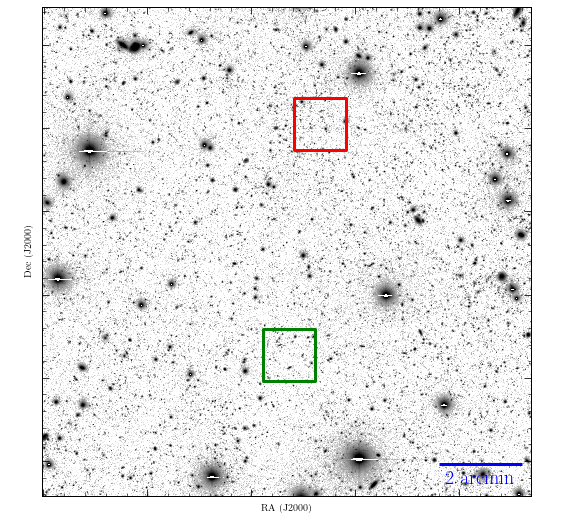

In [135]:
gc = aplpy.FITSFigure('/Users/lejay/Desktop/9571_46_1/calexp-9571-4-6.fits')
gc.show_grayscale(stretch='log',vmin=1)

gc.show_rectangles(rand1_center[0], rand1_center[1], [width], [width],linewidth=3,color='r')
gc.show_rectangles(rand2_center[0], rand2_center[1], [width], [width],linewidth=3,color='g')

gc.tick_labels.hide()

gc.add_scalebar(2./60)  # in degrees
gc.scalebar.set(linestyle='solid', color='blue', linewidth=3)
gc.scalebar.set_label('2 arcmin')
gc.scalebar.set_font(size=20)

gc.set_theme('publication')
gc.save('/Users/lejay/Desktop/9571_46_1/calexp-9571-4-6.png')

INFO: Auto-setting vmax to  2.017e+02 [aplpy.core]


/Users/lejay/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


INFO: Auto-setting vmax to  1.097e+02 [aplpy.core]


/Users/lejay/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


INFO: Auto-setting vmax to  1.086e+02 [aplpy.core]


INFO: Auto-setting vmax to  2.486e+02 [aplpy.core]


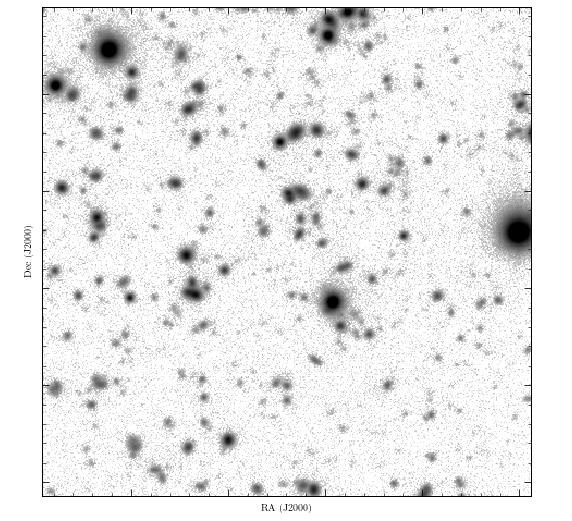

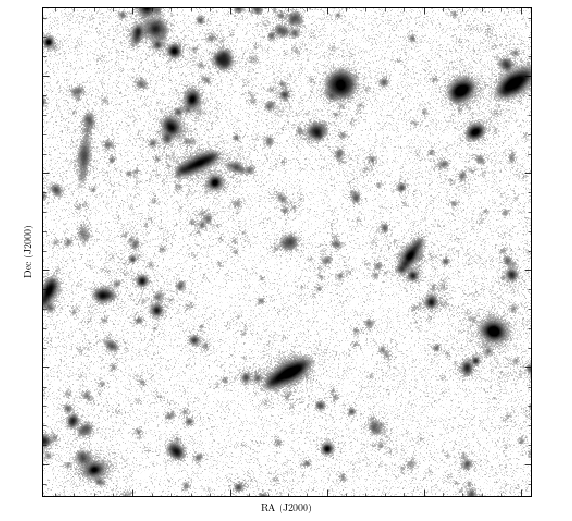

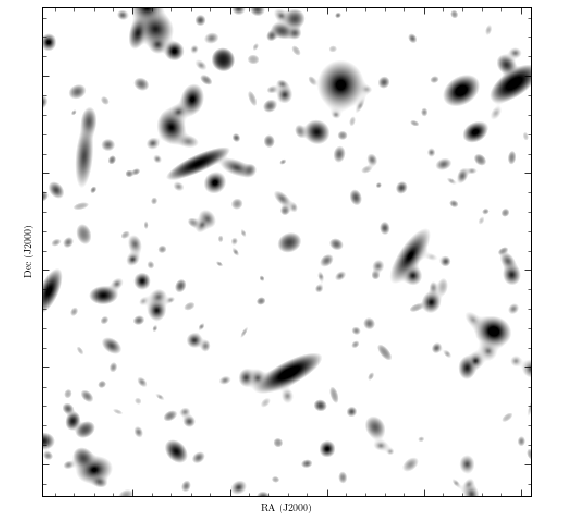

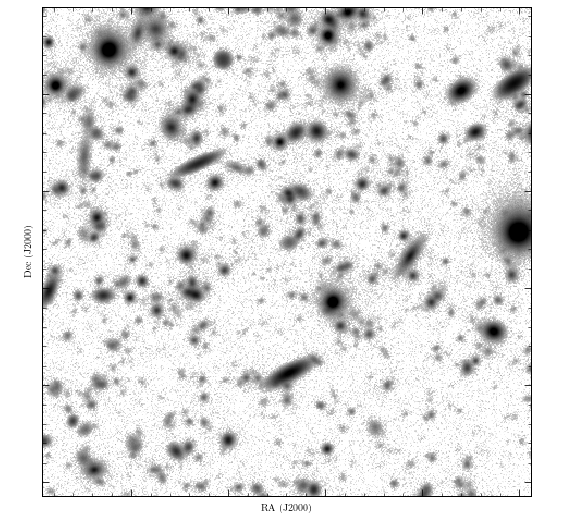

In [137]:
im_list = ['cutout_9571_46_1.fits',
           'cutout_9571_46_1_9_rand.fits',
           'cutout_9571_46_1_9_rand_models.fits',
           'cutout_9571_46_1_chi2_sum.fits']

for im in im_list:
    gc = aplpy.FITSFigure('/Users/lejay/Desktop/9571_46_1/'+im)
    gc.show_grayscale(stretch='log',vmin=1)
    gc.tick_labels.hide()
    gc.set_theme('publication')
    gc.save('/Users/lejay/Desktop/9571_46_1/'+im.replace('.fits','.png'))

### comparison between old and new data
run from the same code

In [4]:
curves_mass_old = np.genfromtxt('completeness_curve_old_data/curves/comp_bootstrap_olddata_mass_0.5_0.7.txt')
comp_old_all = np.median(curves_mass_old, axis=0)
comp_old_all_l = np.percentile(curves_mass_old,16, axis=0)
comp_old_all_h = np.percentile(curves_mass_old,84, axis=0)

curves_mass_new = np.genfromtxt('completeness_curve_old_data/curves/comp_bootstrap_newdata_mass_0.5_0.7.txt')
comp_new_all = np.median(curves_mass_new, axis=0)
comp_new_all_l = np.percentile(curves_mass_new,16, axis=0)
comp_new_all_h = np.percentile(curves_mass_new,84, axis=0)

Text(0, 0.5, 'completeness')

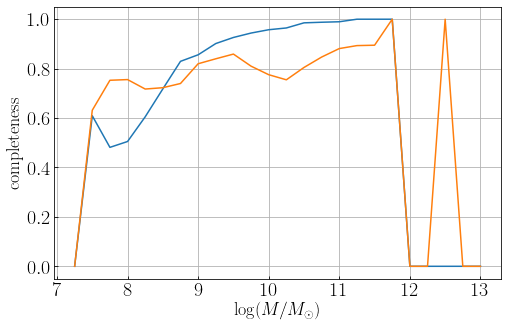

In [5]:
bin_edges = np.linspace(7, 13, num=25)
bin_centers = np.diff(bin_edges) + bin_edges[:-1]

plt.figure(figsize = (8, 5))
plt.plot(bin_centers,comp_old_all)
plt.plot(bin_centers,comp_new_all)
plt.grid()

plt.xlabel(r'$\log(M/M_\odot)$',fontsize=18)
plt.ylabel('completeness',fontsize=18)

mass/redshift distribution

In [6]:
cat_old = Table.read('CUT_deep_catalogs/completeness_useful_params/DEEP_deep_old_cat_gal_cut_params.fits')
cat_new = Table.read('clauds_cat_v2020/completeness_useful_params_cat/DEEP_deep_gal_cut_params.fits')

cat_mock_old = Table.read('completeness_curve_old_data/matched_olddata_cat_stack_DEEP_deep.fits')
cat_mock_new = Table.read('completeness_curve_old_data/matched_newdata_cat_stack_DEEP_deep.fits')

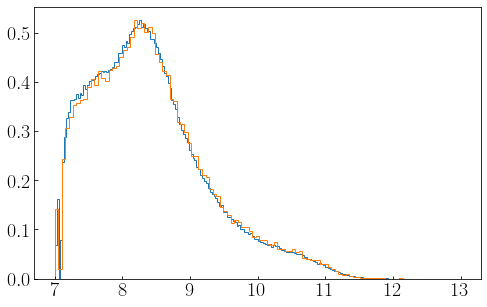

In [11]:
plt.figure(figsize = (8, 5))
plt.hist(cat_old['MASS_MED'],range=(7,13),bins='scott',histtype='step',density=True)
plt.hist(cat_mock_old['MASS_MED'],range=(7,13),bins='scott',histtype='step',density=True)
plt.show()

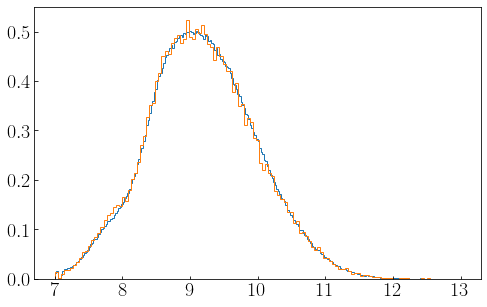

In [12]:
plt.figure(figsize = (8, 5))
plt.hist(cat_new['MASS_MED'],range=(7,13),bins='scott',histtype='step',density=True)
plt.hist(cat_mock_new['MASS_MED'],range=(7,13),bins='scott',histtype='step',density=True)
plt.show()

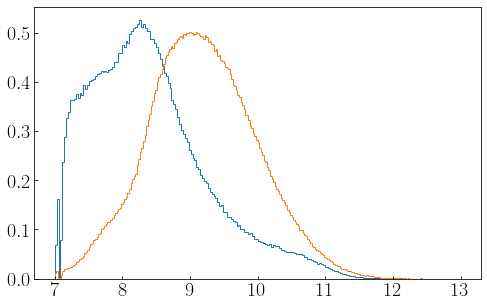

In [13]:
plt.figure(figsize = (8, 5))
plt.hist(cat_old['MASS_MED'],range=(7,13),bins='scott',histtype='step',density=True)
plt.hist(cat_new['MASS_MED'],range=(7,13),bins='scott',histtype='step',density=True)
plt.show()

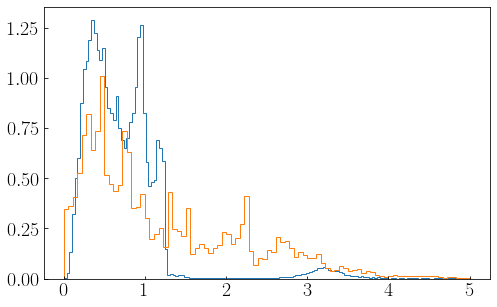

In [19]:
plt.figure(figsize = (8, 5))
plt.hist(cat_mock_old['zKDEPeak'],range=(0,5),bins='scott',histtype='step',density=True)
plt.hist(cat_mock_new['Z_BEST'],range=(0,5),bins='scott',histtype='step',density=True)
plt.show()

### direct comparison of SNR(chi2) images

In [168]:
img_old = fits.open('/Users/lejay/Desktop/9571_46_1/chi2_9571_46.fits')
img_new = fits.open('/Users/lejay/Desktop/9571_46_1/calexp-9571-4-6.fits')

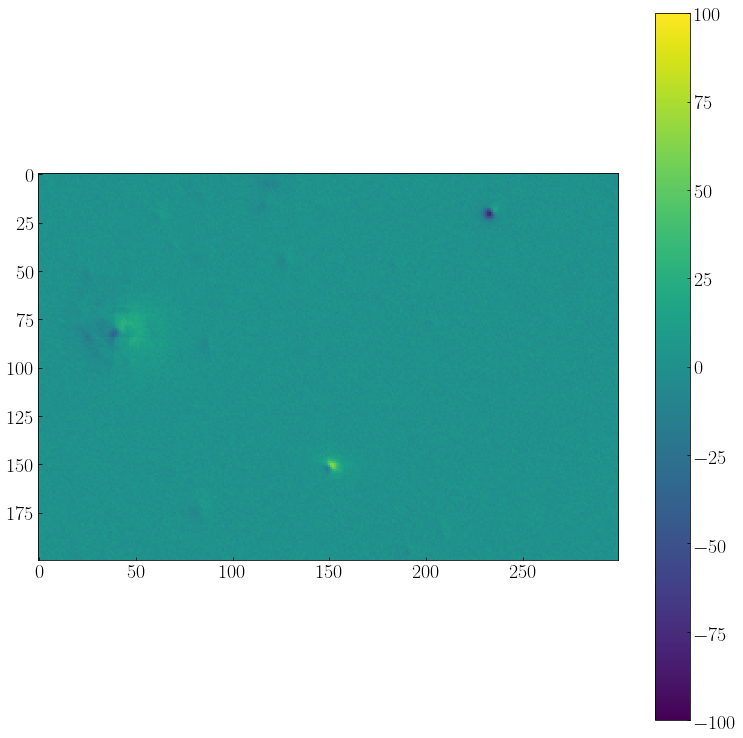

In [400]:
data = img_new[0].data-img_old[0].data

plt.figure(figsize = (13, 13))
plt.imshow(data[1800:2000,3900:],vmin=-100,vmax=100)
plt.colorbar()



In [365]:
im = fits.open('/Users/lejay/Desktop/9571_46_1/cutout_9571_46_1_6_rand_models.fits')

INFO: Auto-setting vmax to  7.047e+02 [aplpy.core]


/Users/lejay/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


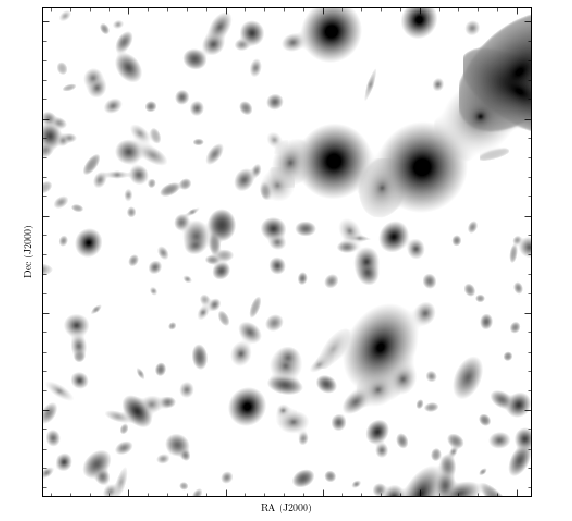

In [367]:
fig = aplpy.FITSFigure('/Users/lejay/Desktop/9571_46_1/cutout_9571_46_1_6_rand_models.fits')
fig.show_grayscale(stretch='log',vmin=0.3)
fig.tick_labels.hide() 
fig.set_theme('publication')

In [379]:
from astropy.table import Table
import astropy.units as u
from astropy.coordinates import SkyCoord, match_coordinates_sky

cat = Table.read('clauds_cat_v2020/COSMOS_test.fits')
coords = SkyCoord(cat['RA']*u.deg,cat['DEC']*u.deg)
idx, sep2d, dist3d = match_coordinates_sky(SkyCoord(151.052131, 1.197225, unit="deg"), coords, nthneighbor=1)

In [380]:
print(cat[idx]['Z_BEST'])
print(cat[idx]['MASS_MED'])
print(cat[idx]['RA'],cat[1029]['DEC'])

3.205
10.2303
151.06270055049575 1.046144755265155


In [279]:
from cut_img import *
from astropy import wcs

In [385]:
w=wcs.WCS(im[0].header)
x,y = w.wcs_world2pix(151.052131, 1.197225, 0)

cutout_path = '/Users/lejay/Desktop/9571_46_1/'
cutoutimg(im, x, y, xw=21, yw=21, units='pixels',
                          outfile=cutout_path+'cutout_model_one_gal2.fits')

INFO: Auto-setting vmax to  2.897e+01 [aplpy.core]


/Users/lejay/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


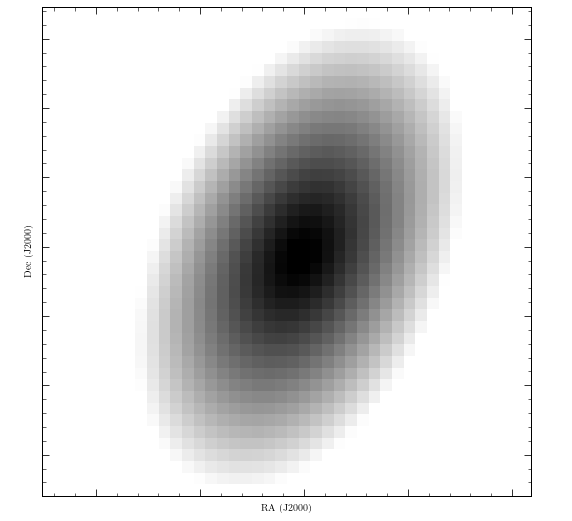

In [386]:
fig = aplpy.FITSFigure('/Users/lejay/Desktop/9571_46_1/cutout_model_one_gal2.fits')
fig.show_grayscale(stretch='log',vmin=0.3)
fig.tick_labels.hide()
fig.set_theme('publication')
fig.save('/Users/lejay/Desktop/9571_46_1/cutout_model_one_gal2.png')

In [323]:
from astropy.table import vstack

In [389]:
for i in range(20):
    if i==0:
        cat_stack = Table.read('/Users/lejay/Desktop/9571_46_1/model_completeness_'+str(i)+'.fits')
    else:
        cat = Table.read('/Users/lejay/Desktop/9571_46_1/model_completeness_'+str(i)+'.fits')
        cat_stack = vstack([cat_stack,cat])

cat_stack.write('/Users/lejay/Desktop/9571_46_1/model_completeness.fits',overwrite=True)

In [390]:
model_comp_cat = Table.read('/Users/lejay/Desktop/9571_46_1/model_completeness.fits')

In [391]:
f_scales = 1.4**np.linspace(-28, 7, 50)

detected_rate = []
for f_scale in f_scales:
    model_comp_cat_f_scale = model_comp_cat[abs(model_comp_cat['f_scale']-f_scale)/f_scale<0.001]
    detected_f_scale = model_comp_cat_f_scale[model_comp_cat_f_scale['detected']]
    detected_rate.append(len(detected_f_scale)/len(model_comp_cat_f_scale))

Text(0.5, 0, 'fScale')

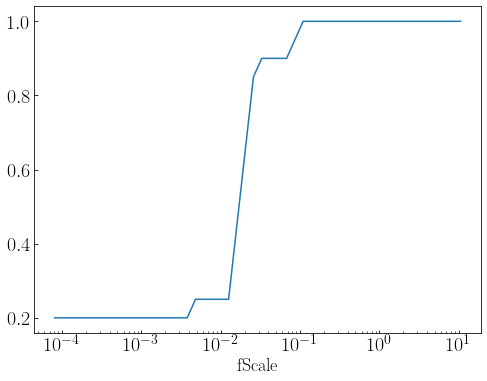

In [393]:
plt.figure(figsize = (8, 6))
plt.plot(f_scales,detected_rate)
plt.xscale('log')
# plt.xlim(1e-4,1)
plt.xlabel('fScale',fontsize=18)

In [406]:
from scipy.special import gamma

In [409]:
D=15
np.pi**(D/2)/(D*2**(D-1)*gamma(D/2))*1e6

11.640725122781506

### 10 patch small scale test in DEEP2

9463: 33, 34, 35, 44, 45

9464: 33, 34, 43, 44, 45

In [7]:
from astropy.coordinates import SkyCoord, match_coordinates_sky
import astropy.units as u

In [8]:
cat_name = 'DEEP_deep'

# cat_random
cat_random_new = Table.read('/Users/lejay/research/massive_gals/CUT_deep_catalogs/random_point_cat/'+cat_name+'_random_point.fits')
cat_random_new = cat_random_new[np.logical_and(cat_random_new['inside'] != 0, cat_random_new['MASK']==False)]

cat_random_old = Table.read('/Users/lejay/research/massive_gals/CUT_deep_catalogs/s16a_'+cat_name+'_random.fits')
if cat_name != 'XMM-LSS_deep':
    cat_random_old = cat_random_old[np.logical_and(cat_random_old['inside_u'] != 0, cat_random_old['MASK']==False)]
else:
    cat_random_old = cat_random_old[np.logical_and(cat_random_old['inside_u'] != 0, cat_random_old['MASK'] == False)]
    
    
coord_random_new = SkyCoord(np.array(cat_random_new['RA']) * u.deg, np.array(cat_random_new['DEC']) * u.deg)
coord_random_old = SkyCoord(np.array(cat_random_old['RA']) * u.deg, np.array(cat_random_old['DEC']) * u.deg)

In [ ]:
tract_patch_cat = Table.read('tracts_patches/DEEP_deep_patches.fits')
print('a')
tract = '9463'
tract_cat = tract_patch_cat[tract_patch_cat['tract']==tract]
patches = ['33','34','35','44','45']

ra_dec_matrix = []
count = 0
for patch in patches:
    print(tract,patch)
    patch_line = tract_cat[tract_cat['patch']==patch][0]
    
    ra_min, ra_max = patch_line['corner1'][0],patch_line['corner0'][0]
    dec_min, dec_max = patch_line['corner1'][1],patch_line['corner2'][1]
    
    while count<110:
        ra_rand = ra_min + np.random.random()*(ra_max-ra_min)
        dec_rand = dec_min + np.random.random()*(dec_max-dec_min)
    
        idx, sep2d_old, dist3d = match_coordinates_sky(SkyCoord(ra_rand, dec_rand, unit="deg"), coord_random_old, nthneighbor=1)
        idx, sep2d_new, dist3d = match_coordinates_sky(SkyCoord(ra_rand, dec_rand, unit="deg"), coord_random_new, nthneighbor=1)
        if sep2d_old.degree<2/3600. and sep2d_new.degree<2/3600.:
            ra_dec_matrix.append([ra_rand,dec_rand])
            count += 1
            
    ra_dec_matrix = np.array(ra_dec_matrix).reshape(10,11,2)
    np.save('completeness_curve_old_data/rand_pos_choice/'+tract+'_'+patch+'rand_pos.npy',ra_dec_matrix)
    

a
9463 33


In [14]:
ra_dec_matrix = ra_dec_matrix.ravel()

In [19]:
ra_dec_matrix = ra_dec_matrix.reshape(5,3,2)

In [20]:
ra_dec_matrix[0]

array([[351.364,  -0.948],
       [351.317,  -0.978],
       [351.362,  -0.933]])